<a href="https://colab.research.google.com/github/MuhammadTanveerm/MuhammadTanveerm-HR-Analytics-Employee-Attrition-Performanc-/blob/main/HR_Analytics_Employee_Attrition_%26_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Dataset**

In [ ]:
df= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Machine Learning/ML Projects/HR Analytics Employee Attrition & Performance/HR analytic.xlsx')

# **Exploratory Data Analysis**

In [ ]:
df.head()

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,JobRole,JobSatisfaction,MonthlyIncome,OverTime,PerformanceRating,WorkLifeBalance
0,41,Yes,Sales,2,Life Sciences,2,Sales Executive,4,5993,Yes,3,1
1,49,No,Research & Development,1,Life Sciences,3,Research Scientist,2,5130,No,4,3
2,37,Yes,Research & Development,2,Other,4,Laboratory Technician,3,2090,Yes,3,3
3,33,No,Research & Development,4,Life Sciences,4,Research Scientist,3,2909,Yes,3,3
4,27,No,Research & Development,1,Medical,1,Laboratory Technician,2,3468,No,3,3


In [ ]:
ma = df['Age'] == 28
print(ma.sum())

48


In [ ]:
df.shape


(1470, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   Education                1470 non-null   int64 
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   JobRole                  1470 non-null   object
 7   JobSatisfaction          1470 non-null   int64 
 8   MonthlyIncome            1470 non-null   int64 
 9   OverTime                 1470 non-null   object
 10  PerformanceRating        1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 137.9+ KB


In [ ]:
df.describe()

,Age,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,PerformanceRating,WorkLifeBalance
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,2.721769,2.728571,6502.931293,3.153741,2.761224
std,9.135373,1.024165,1.093082,1.102846,4707.956783,0.360824,0.706476
min,18.000000,1.000000,1.000000,1.000000,1009.000000,3.000000,1.000000
25%,30.000000,2.000000,2.000000,2.000000,2911.000000,3.000000,2.000000
50%,36.000000,3.000000,3.000000,3.000000,4919.000000,3.000000,3.000000
75%,43.000000,4.000000,4.000000,4.000000,8379.000000,3.000000,3.000000
max,60.000000,5.000000,4.000000,4.000000,19999.000000,4.000000,4.000000


Check Missing Values

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
Department,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
JobRole,0
JobSatisfaction,0
MonthlyIncome,0
OverTime,0


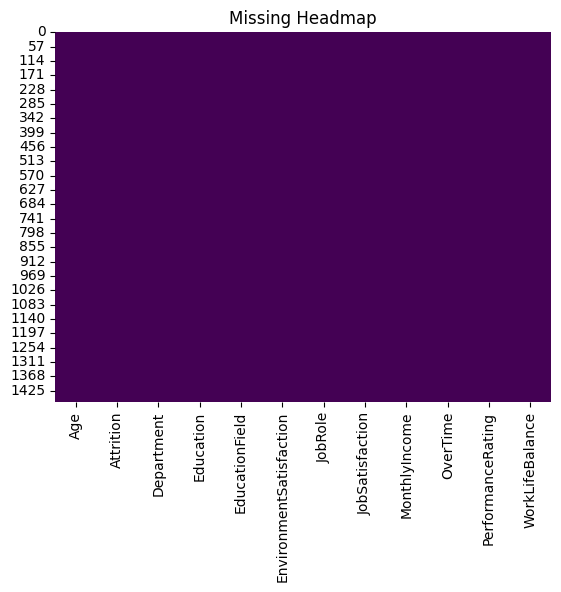

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Headmap')
plt.show()

Handle Outliers

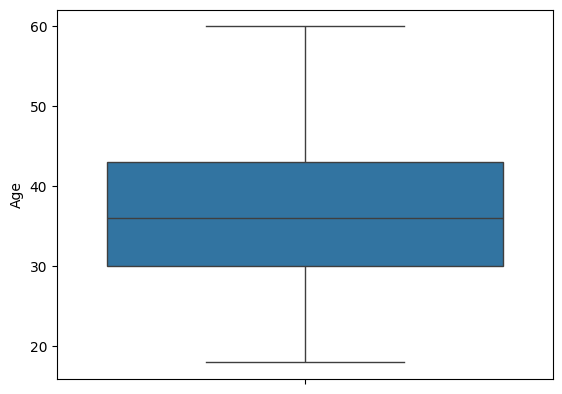

In [ ]:
sns.boxplot(df['Age'])
plt.show()

Histogram

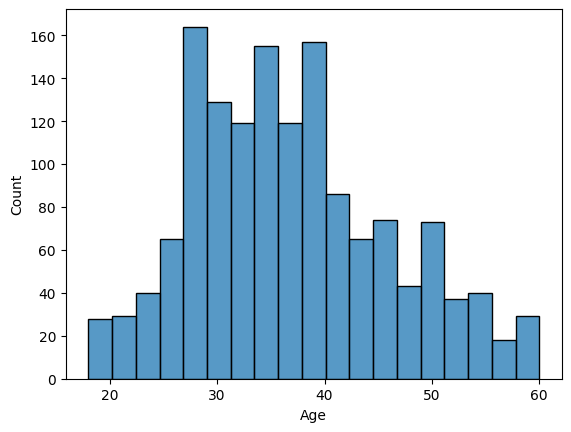

In [ ]:
sns.histplot(df['Age'])
plt.show()
#

Z-Score

In [ ]:
from scipy.stats import zscore

# Select only numerical columns for z-score calculation
numerical_df = df.select_dtypes(include=np.number)

z_score = np.abs(zscore(numerical_df))
print(z_score)

[[0.4463504  0.89168825 0.66053067 ... 0.10834951 0.42623002 2.49382042]
 [1.32236521 1.86842575 0.25462493 ... 0.29171859 2.34615106 0.33809616]
 [0.008343   0.89168825 1.16978053 ... 0.93765369 0.42623002 0.33809616]
 ...
 [1.08667552 0.08504925 0.66053067 ... 0.07669019 2.34615106 0.33809616]
 [1.32236521 0.08504925 1.16978053 ... 0.23647414 0.42623002 1.07786213]
 [0.32016256 0.08504925 0.66053067 ... 0.44597809 0.42623002 1.75405446]]


Univariate Analysis

/tmp/ipython-input-3786006385.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EnvironmentSatisfaction'])


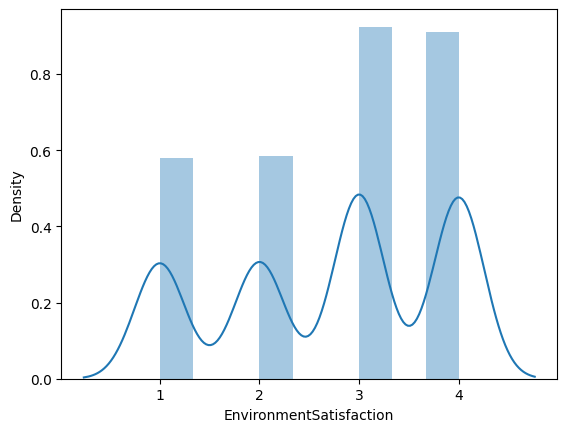

In [ ]:
#Numberical
sns.distplot(df['EnvironmentSatisfaction'])
plt.show()

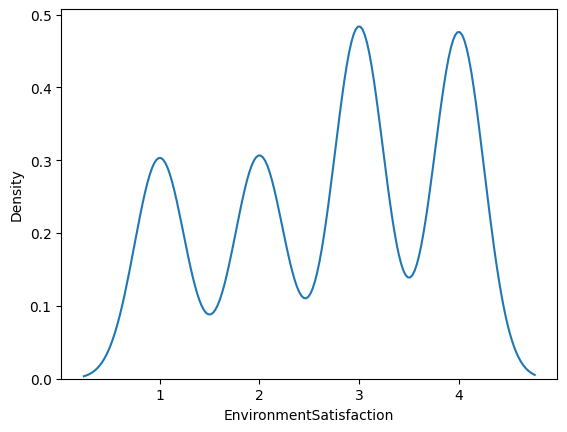

In [ ]:
sns.kdeplot(df['EnvironmentSatisfaction'])
plt.show()

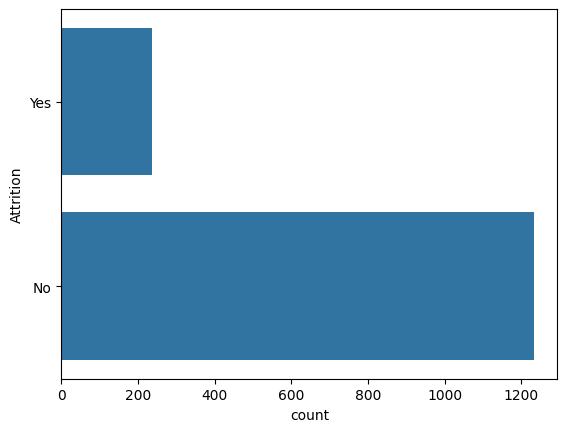

In [ ]:
#categorical
sns.countplot(df['Attrition'])
plt.show()

In [ ]:
#frequency tables
fr = df['Attrition'].value_counts()
print(fr)


Attrition
No     1233
Yes     237
Name: count, dtype: int64


Bivariate Analysis

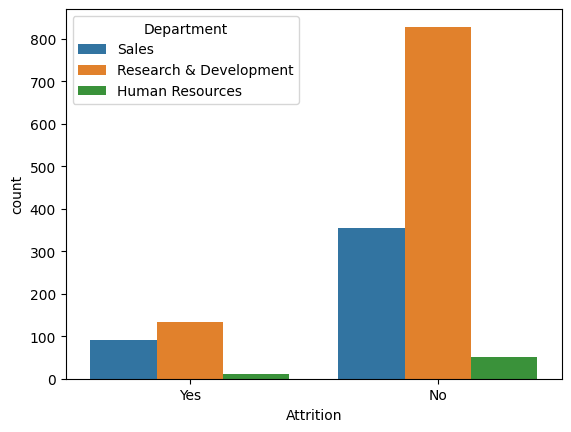

In [ ]:
#Relationship between target and predictor

sns.countplot(x='Attrition', hue='Department', data=df)
plt.show()

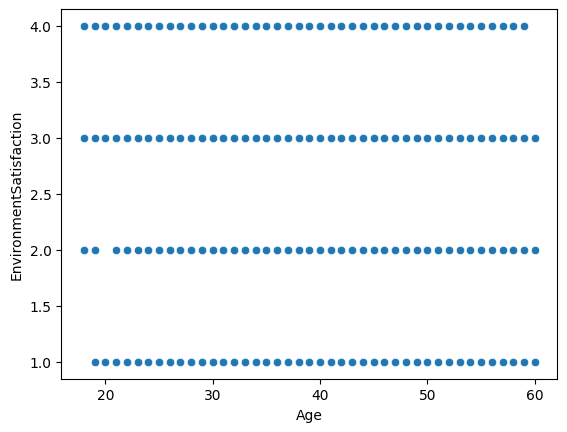

In [ ]:
#Numerical vs Numerical
sns.scatterplot(x='Age', y='EnvironmentSatisfaction', data=df)
plt.show()

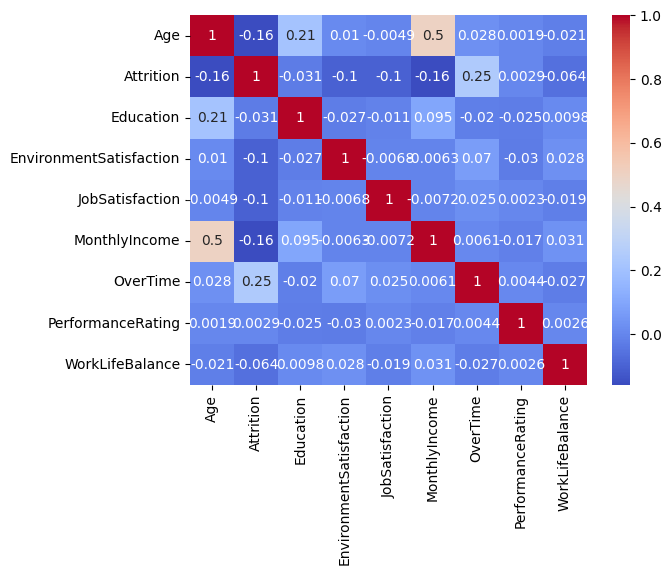

In [ ]:
# Encode binary categorical columns to numerical for correlation calculation
df_encoded = df.copy()
df_encoded['Attrition'] = df_encoded['Attrition'].map({'Yes': 1, 'No': 0})
df_encoded['OverTime'] = df_encoded['OverTime'].map({'Yes': 1, 'No': 0})

# Select only numerical columns, including the newly encoded ones
numerical_cols = df_encoded.select_dtypes(include=np.number)

# Calculate correlation matrix for numerical columns
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

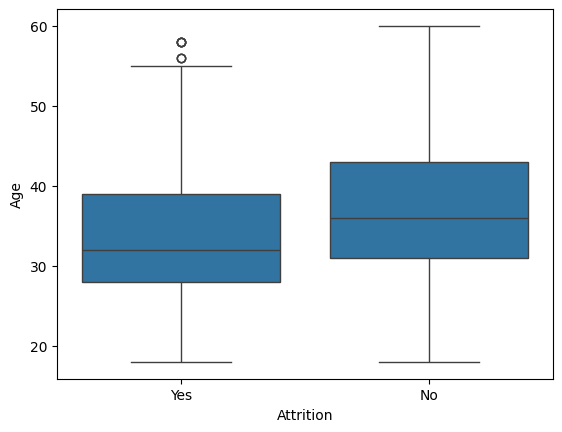

In [ ]:
#Numerical vs Categorical
sns.boxplot(x='Attrition', y='Age', data=df)
plt.show()
#

Correlation Analysis

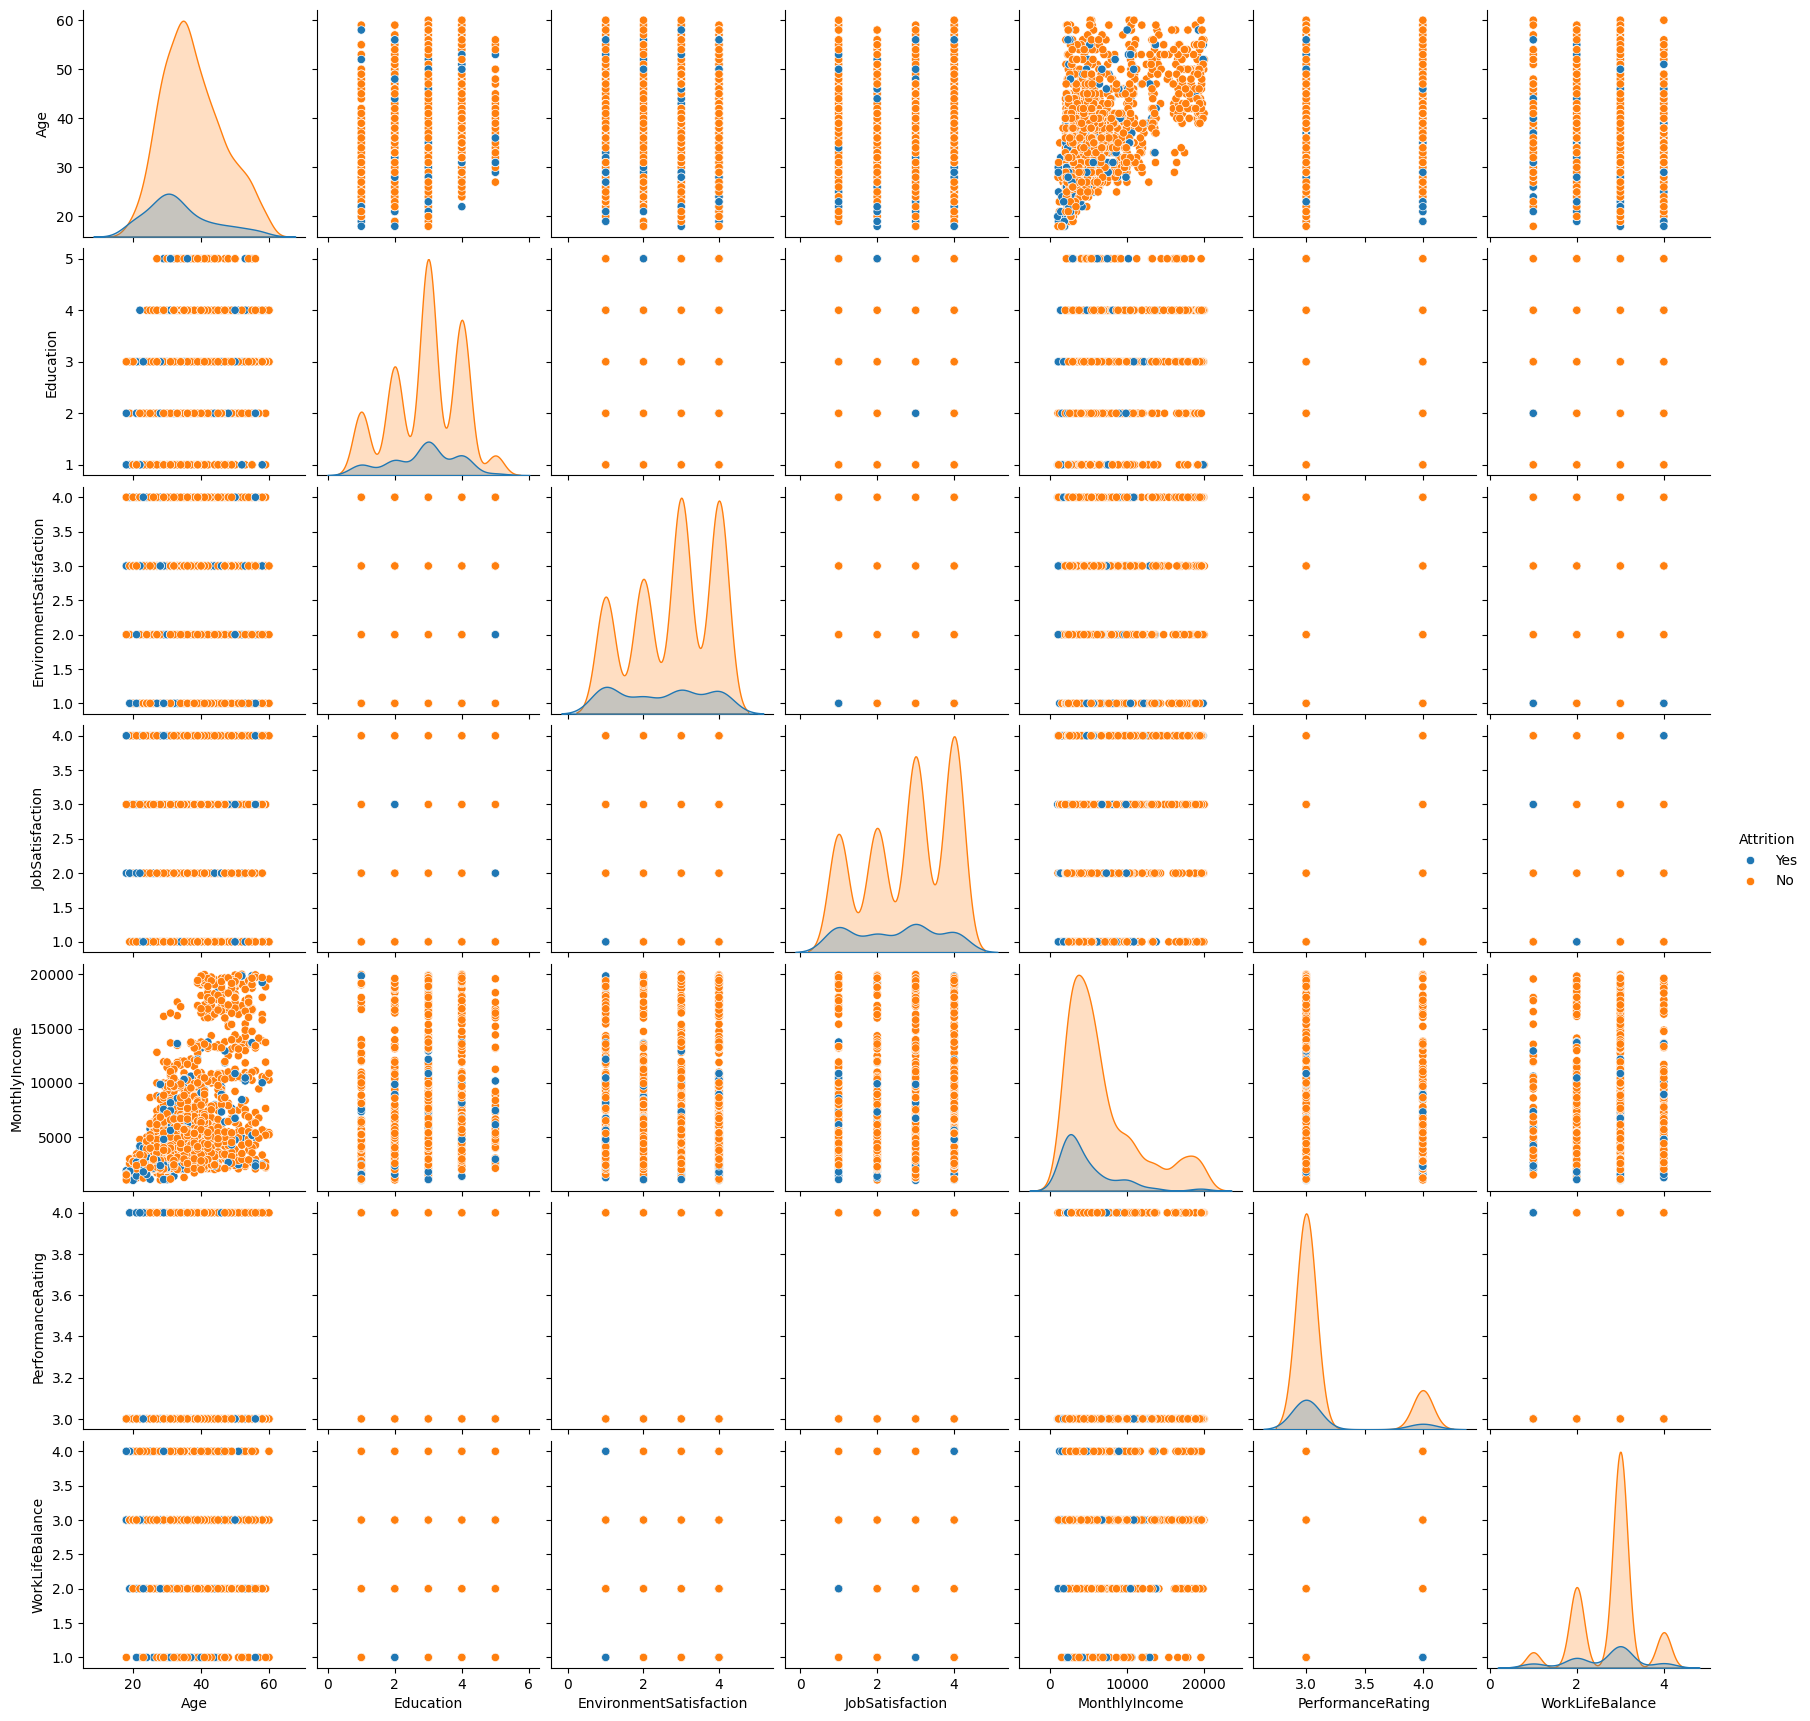

In [ ]:
#Pairplot
sns.pairplot(df, hue='Attrition')
plt.show()
#

Detect Patterns and Insights

In [ ]:
#detect insights


Advance EDA

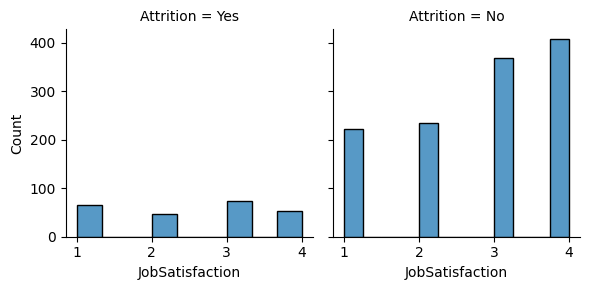

In [ ]:
#facet Grid
g = sns.FacetGrid(df, col='Attrition')
g.map(sns.histplot, 'JobSatisfaction')
plt.show()
#

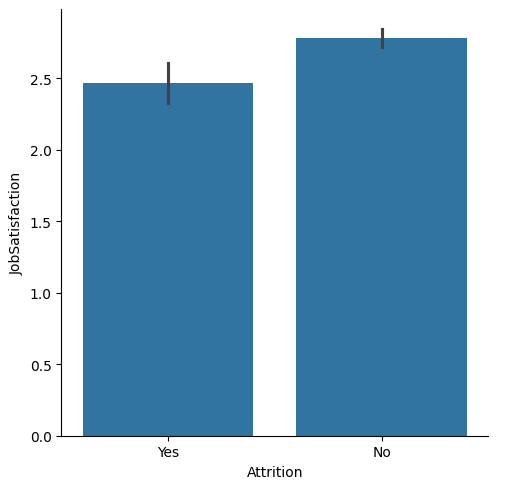

In [ ]:
#Sunbrust
sns.catplot(x='Attrition', y='JobSatisfaction', kind='bar', data=df)
plt.show()
#

Statistical Test

In [ ]:
#T-test for MonthlyIncome vs Attrition
from scipy.stats import ttest_ind

# Separate MonthlyIncome into two groups based on 'Attrition'
income_attrition_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
income_attrition_no = df[df['Attrition'] == 'No']['MonthlyIncome']

# Perform independent t-test
t_stat_income, p_val_income = ttest_ind(income_attrition_yes, income_attrition_no, equal_var=False) # Assuming unequal variances

print(f"T-statistic for MonthlyIncome: {t_stat_income:.3f}")
print(f"P-value for MonthlyIncome: {p_val_income:.3f}")

if p_val_income < 0.05:
    print("There is a statistically significant difference in monthly income between employees who attrited and those who did not.")
else:
    print("There is no statistically significant difference in monthly income between employees who attrited and those who did not.")

T-statistic for MonthlyIncome: -7.483
P-value for MonthlyIncome: 0.000
There is a statistically significant difference in monthly income between employees who attrited and those who did not.


# **Preprocessing**

Handling Missing values

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
Department,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
JobRole,0
JobSatisfaction,0
MonthlyIncome,0
OverTime,0


In [ ]:
#drop missing values
df.drop_duplicates()
df.dropna(inplace= True)

Fill Missing Values

In [ ]:

numerical_cols = df.select_dtypes(include=np.number).columns
#mean
mean_values = df[numerical_cols].mean()
df[numerical_cols] = df[numerical_cols].fillna(mean_values)

#mode
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
#all object
df = df.apply(le.fit_transform)


In [ ]:
df.tail()

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,JobRole,JobSatisfaction,MonthlyIncome,OverTime,PerformanceRating,WorkLifeBalance
1465,18,0,1,1,3,2,2,3,210,0,0,2
1466,21,0,1,0,3,3,0,0,1070,0,0,2
1467,9,0,1,2,1,1,4,1,821,1,1,2
1468,31,0,2,2,3,3,7,1,730,0,0,1
1469,16,0,1,2,3,1,2,2,554,0,0,3


Scaling Numerical Features(standard Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#All data
df_scaled = scaler.fit_transform(df)


Features **Engineering**

In [ ]:
# Separate target (y) from features (X) BEFORE scaling 'y'
y = df['Attrition']
X_df = df.drop('Attrition', axis=1)

# Scale only the feature columns
scaler = StandardScaler()
X = scaler.fit_transform(X_df)

In [ ]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Model **Apply**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
print(y_pred_lr)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


### Classify with New Data Array

To classify new data, you need to provide the new data in the same format as your training features (i.e., 11 numerical features, excluding the 'Attrition' column). The data should then be scaled using the same `StandardScaler` that was fitted on your training data (`X_df`).

In [ ]:
import numpy as np

# Define your new data array here.
# IMPORTANT: It must have 11 features, matching the columns of X_df before scaling.
# Example: Age, Department, Education, EducationField, EnvironmentSatisfaction, JobRole, JobSatisfaction, MonthlyIncome, OverTime, PerformanceRating, WorkLifeBalance
# These values should be label-encoded if they were categorical in the original df.
# For instance, if 'Department' was originally 'Sales' and got encoded to 2, use 2 here.

# Placeholder for new raw data (replace with your actual data)
# Example values shown below. Adjust as per your new employee's characteristics.
new_raw_data = np.array([
    [35, 2, 1, 1, 2, 6, 2, 10000, 1, 3, 2] # Example values for one new employee
])

# Use the already fitted scaler to transform the new raw data.
# The 'scaler' object was fitted on X_df in a previous cell (J3zvS8F8d2E7).
scaled_new_data = scaler.transform(new_raw_data)

# Make prediction with the trained logistic regression model (lr)
new_prediction = lr.predict(scaled_new_data)

# Decode the prediction (0=No Attrition, 1=Yes Attrition)
predicted_attrition = 'Yes' if new_prediction[0] == 1 else 'No'

print(f"Predicted Attrition for the new employee: {predicted_attrition} (Encoded: {new_prediction[0]})\n")
print("Note: Ensure the new_raw_data array matches the feature order and encoding of your original training data.")

Predicted Attrition for the new employee: No (Encoded: 0)

Note: Ensure the new_raw_data array matches the feature order and encoding of your original training data.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Model **Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuray = accuracy_score(y_test, y_pred_lr)
classification_report = classification_report(y_test, y_pred_lr)
confusion_matrix = confusion_matrix(y_test, y_pred_lr)
print(f"Accuracy Score of Logistic Regression: {accuray}")
print(f"Classification Report of LR: {classification_report}")
print(f"{confusion_matrix}")

Accuracy Score of Logistic Regression: 0.8673469387755102
Classification Report of LR:               precision    recall  f1-score   support

           0       0.88      0.98      0.93       256
           1       0.45      0.13      0.20        38

    accuracy                           0.87       294
   macro avg       0.67      0.55      0.57       294
weighted avg       0.83      0.87      0.83       294

[[250   6]
 [ 33   5]]


Predict New with Data

In [ ]:
# New Data (example using a row from X_test, which is already scaled and encoded)
# In a real scenario, you would preprocess your raw new data (label encode then scale)
# using the same encoders and scaler fitted on your training data.
new_data_point = X_test[0].reshape(1, -1) # Reshape to a 2D array for prediction

# Make prediction
prediction = lr.predict(new_data_point)

print(f"Predicted Attrition (0=No, 1=Yes): {prediction[0]}")

Predicted Attrition (0=No, 1=Yes): 0
